# Aula 02

Regressão Linear e Logistica

* Visualização dos dados.
* Tratamento em datasets (ETL).
* Correlação.
* Separação para treino, teste e validação.

## Bibliotecas auxiliares - Numpy e pandas

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Importando dataset

O arquivo do dataset já está no repositório na mesma pasta deste notebook. Caso esteja usando ele separadamente, você pode baixa-lo da fonte citada abaixo.

| Coluna                  | Descrição                                                                           |
| ----------------------- | ----------------------------------------------------------------------------------- |
| **studyName**           | Nome do estudo/projeto de coleta. No caso, “PAL0708” (Palmer LTER, ano 2007–2008).  |
| **Sample Number**       | Número sequencial da amostra. Identificador único dentro do estudo.                 |
| **Species**             | Espécie do pinguim (*Adelie*, *Chinstrap*, *Gentoo*).                               |
| **Region**              | Região geográfica da coleta (sempre “Anvers” = Anvers Island, Antártida).           |
| **Island**              | Ilha específica dentro da região: *Torgersen*, *Biscoe* ou *Dream*.                 |
| **Stage**               | Estágio do ciclo reprodutivo, geralmente “Incubating” (incubação).                  |
| **Individual ID**       | Identificador único para cada pinguim observado.                                    |
| **Clutch Completion**   | Se o casal completou a postura de ovos (“Yes” ou “No”).                             |
| **Date Egg**            | Data da postura do primeiro ovo (formato `yyyy-mm-dd`).                             |
| **Culmen Length (mm)**  | Comprimento do bico (culmen) em milímetros.                                         |
| **Culmen Depth (mm)**   | Profundidade/altura do bico em milímetros.                                          |
| **Flipper Length (mm)** | Comprimento da nadadeira em milímetros.                                             |
| **Body Mass (g)**       | Massa corporal em gramas.                                                           |
| **Sex**                 | Sexo do pinguim (*Male* ou *Female*).                                               |
| **Delta 15 N (o/oo)**   | Valor isotópico δ¹⁵N do tecido do pinguim (indica nível trófico/dieta).             |
| **Delta 13 C (o/oo)**   | Valor isotópico δ¹³C do tecido do pinguim (indica tipo de fonte alimentar/marinha). |
| **Comments**            | Notas adicionais do pesquisador (pouco preenchido).                                 |


Fonte primária:
Gorman, K. B., Williams, T. D., & Fraser, W. R. (2014). Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE, 9(3), e90081. https://doi.org/10.1371/journal.pone.0090081

In [52]:
df = pd.read_csv('penguins_lter.csv')

### Visualizações Básicas de um dataset

In [6]:
df.tail(3)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN
343,PAL0910,124,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A2,Yes,11/22/09,49.9,16.1,213.0,5400.0,MALE,8.36390,-26.15531,NaN


In [7]:
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [ ]:
# df.dropna(inplace=True)
# df = df.dropna()

In [15]:
df['Body Mass (g)']

6      3625.0
7      4675.0
28     3150.0
29     3950.0
38     3300.0
68     3050.0
69     4450.0
120    3150.0
121    3500.0
130    3325.0
131    3500.0
138    3400.0
139    4250.0
Name: Body Mass (g), dtype: float64

In [19]:
df['Sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [23]:
df[df['Sex'] == 'MALE'].head(3)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805,NaN
7,PAL0708,8,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A2,No,11/15/07,39.2,19.6,195.0,4675.0,MALE,9.46060,-24.89958,Nest never observed with full clutch.


In [24]:
df.query('Sex == "MALE"').head(3)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805,NaN
7,PAL0708,8,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A2,No,11/15/07,39.2,19.6,195.0,4675.0,MALE,9.46060,-24.89958,Nest never observed with full clutch.


## Tratamento dos dados

In [53]:
df.drop(columns=['studyName',
                 'Comments'], inplace=True)


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sample Number        344 non-null    int64  
 1   Species              344 non-null    object 
 2   Region               344 non-null    object 
 3   Island               344 non-null    object 
 4   Stage                344 non-null    object 
 5   Individual ID        344 non-null    object 
 6   Clutch Completion    344 non-null    object 
 7   Date Egg             344 non-null    object 
 8   Culmen Length (mm)   342 non-null    float64
 9   Culmen Depth (mm)    342 non-null    float64
 10  Flipper Length (mm)  342 non-null    float64
 11  Body Mass (g)        342 non-null    float64
 12  Sex                  334 non-null    object 
 13  Delta 15 N (o/oo)    330 non-null    float64
 14  Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6), int64(1), object(8)
memor

In [55]:
df.dropna(inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 325 entries, 1 to 343
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sample Number        325 non-null    int64  
 1   Species              325 non-null    object 
 2   Region               325 non-null    object 
 3   Island               325 non-null    object 
 4   Stage                325 non-null    object 
 5   Individual ID        325 non-null    object 
 6   Clutch Completion    325 non-null    object 
 7   Date Egg             325 non-null    object 
 8   Culmen Length (mm)   325 non-null    float64
 9   Culmen Depth (mm)    325 non-null    float64
 10  Flipper Length (mm)  325 non-null    float64
 11  Body Mass (g)        325 non-null    float64
 12  Sex                  325 non-null    object 
 13  Delta 15 N (o/oo)    325 non-null    float64
 14  Delta 13 C (o/oo)    325 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usa

In [61]:
df = df[df['Sex'] != '.']


## Gráficos e visualizações

In [65]:
fig = px.histogram(df['Culmen Length (mm)'])
fig.show()

In [66]:
px.violin(df['Culmen Length (mm)'])

In [73]:
fig = px.violin(df,
      x = "Body Mass (g)",
      y = "Species",
      color = "Species",
      box = True,
      points = "all",
      width = 1000,
      height = 600
).show()

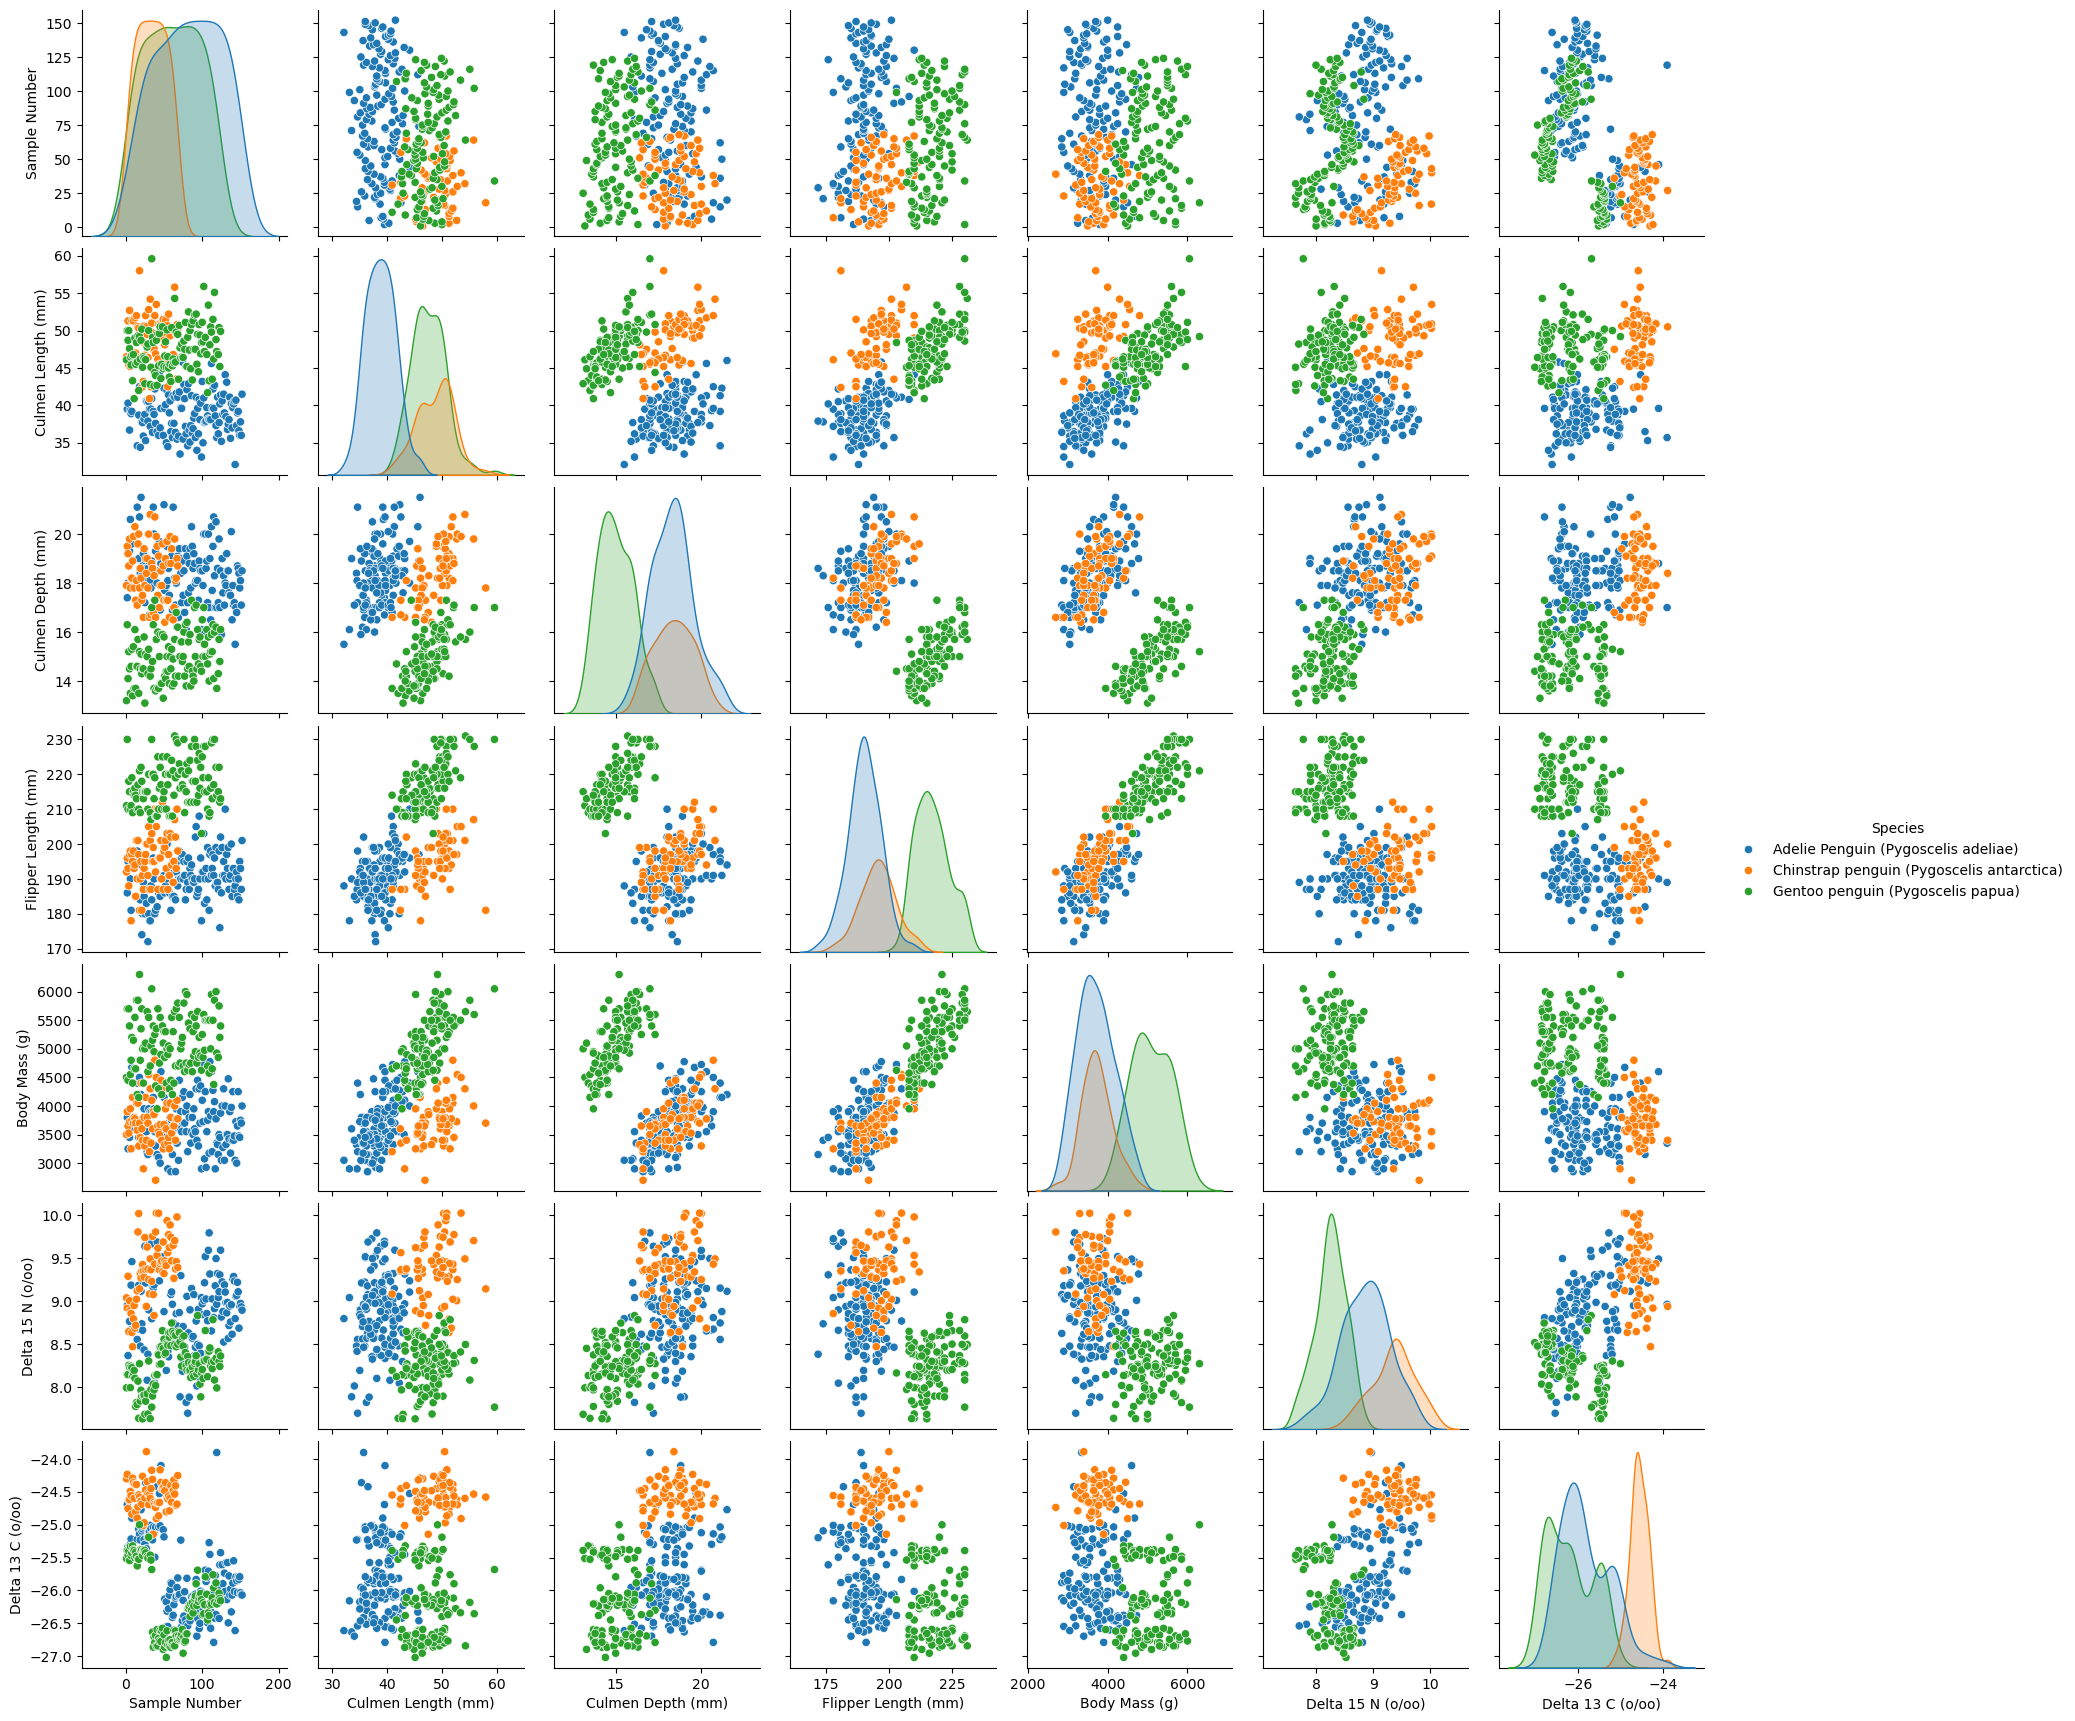

In [74]:
sns.pairplot(df, hue="Species")

In [75]:
df_numericos = df.select_dtypes(include=['float64'])

In [76]:
df_numericos.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
1,39.5,17.4,186.0,3800.0,8.94956,-24.69454
2,40.3,18.0,195.0,3250.0,8.36821,-25.33302
4,36.7,19.3,193.0,3450.0,8.76651,-25.32426
5,39.3,20.6,190.0,3650.0,8.66496,-25.29805
6,38.9,17.8,181.0,3625.0,9.18718,-25.21799


### Correlação entre variáveis

---

### Correlação de Pearson  
O **coeficiente de correlação de Pearson (r de Pearson)** mede a intensidade e a direção da relação **linear** entre duas variáveis quantitativas.  
- Varia entre **-1 e +1**:  
  - `+1` indica correlação linear perfeita positiva.  
  - `-1` indica correlação linear perfeita negativa.  
  - `0` indica ausência de correlação linear.  
- Assume que as variáveis são **contínuas, normalmente distribuídas** e com relação **linear**.  
- Sensível a **outliers**, que podem distorcer o valor do coeficiente.  

---

### Correlação de Spearman  
O **coeficiente de correlação de Spearman (ρ, rho)** mede a intensidade e direção da relação **monotônica** (não necessariamente linear) entre duas variáveis.  
- Baseia-se na **ordenação (ranks)** dos dados, não nos valores absolutos.  
- Também varia entre **-1 e +1**, com a mesma interpretação de direção e intensidade.  
- Pode ser usado com variáveis **ordinais** ou quando a relação não é linear.  
- Menos sensível a outliers em comparação ao Pearson.  

---

## Referências  
- Pearson, K. (1895). *Note on regression and inheritance in the case of two parents.* Proceedings of the Royal Society of London, 58, 240–242. https://doi.org/10.1098/rspl.1895.0041 
- Spearman, C. (1904). *The proof and measurement of association between two things.* The American Journal of Psychology, 15(1), 72–101. http://www.jstor.org/stable/1412159

In [77]:
num_df = df.select_dtypes(include=['float64', 'int64'])

In [78]:
corr = num_df.corr()

In [79]:
print(corr)

                     Sample Number  Culmen Length (mm)  Culmen Depth (mm)  \
Sample Number             1.000000           -0.287177           0.006670   
Culmen Length (mm)       -0.287177            1.000000          -0.222923   
Culmen Depth (mm)         0.006670           -0.222923           1.000000   
Flipper Length (mm)       0.000029            0.648947          -0.574924   
Body Mass (g)            -0.035385            0.591724          -0.470177   
Delta 15 N (o/oo)         0.013260           -0.056942           0.599481   
Delta 13 C (o/oo)        -0.490172            0.188517           0.420012   

                     Flipper Length (mm)  Body Mass (g)  Delta 15 N (o/oo)  \
Sample Number                   0.000029      -0.035385           0.013260   
Culmen Length (mm)              0.648947       0.591724          -0.056942   
Culmen Depth (mm)              -0.574924      -0.470177           0.599481   
Flipper Length (mm)             1.000000       0.877066          -0.501

In [80]:
corr.sort_values(by='Body Mass (g)', ascending=False)

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Body Mass (g),-0.035385,0.591724,-0.470177,0.877066,1.000000,-0.539795,-0.372041
Flipper Length (mm),0.000029,0.648947,-0.574924,1.000000,0.877066,-0.501601,-0.375570
Culmen Length (mm),-0.287177,1.000000,-0.222923,0.648947,0.591724,-0.056942,0.188517
Sample Number,1.000000,-0.287177,0.006670,0.000029,-0.035385,0.013260,-0.490172
Delta 13 C (o/oo),-0.490172,0.188517,0.420012,-0.375570,-0.372041,0.569393,1.000000
Culmen Depth (mm),0.006670,-0.222923,1.000000,-0.574924,-0.470177,0.599481,0.420012
Delta 15 N (o/oo),0.013260,-0.056942,0.599481,-0.501601,-0.539795,1.000000,0.569393


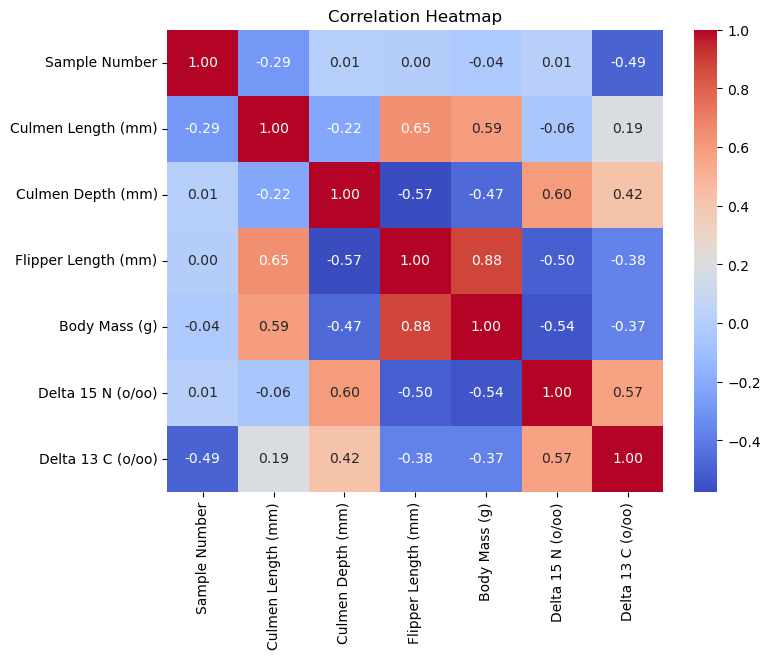

In [81]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [82]:
from scipy.stats import pearsonr

for col in num_df.columns:
    if col != "Body Mass (g)":
        combined_data = pd.DataFrame({
            'body_mass': num_df['Body Mass (g)'],
            'other_col': num_df[col]
        }).dropna()
        pearson_corr, p_val = pearsonr(combined_data['body_mass'], 
                                        combined_data['other_col'])
        print(f"{col:20} | Pearson r = {pearson_corr:.3f}, p = {p_val:.3e}")

Sample Number        | Pearson r = -0.035, p = 5.257e-01
Culmen Length (mm)   | Pearson r = 0.592, p = 5.462e-32
Culmen Depth (mm)    | Pearson r = -0.470, p = 3.180e-19
Flipper Length (mm)  | Pearson r = 0.877, p = 1.485e-104
Delta 15 N (o/oo)    | Pearson r = -0.540, p = 6.745e-26
Delta 13 C (o/oo)    | Pearson r = -0.372, p = 4.489e-12


In [86]:
fig = px.scatter(df, x='Flipper Length (mm)', y='Body Mass (g)',
                 color='Species', trendline='ols',
                 marginal_x='box',
                 marginal_y='violin',
                 width=1000,
                 height=600,
                 template='simple_white')
fig.show()

In [92]:
item_id = 1

results = px.get_trendline_results(fig)
print("Trendline coefficients:")
print(f"a (slope): {results.iloc[item_id]['px_fit_results'].params[1]:.4f}")
print(f"b (intercept): {results.iloc[item_id]['px_fit_results'].params[0]:.4f}")
print(f"R-squared: {results.iloc[item_id]['px_fit_results'].rsquared:.4f}")

Trendline coefficients:
a (slope): 34.9953
b (intercept): -3117.7415
R-squared: 0.4107


## Regreção Linear

A **regressão linear** é um dos métodos estatísticos mais utilizados para modelar a relação entre uma variável dependente (resposta) e uma ou mais variáveis independentes (preditoras).  
O objetivo é **ajustar uma linha (ou hiperplano)** que melhor descreva essa relação.

---

## Equação do Modelo

A equação da regressão linear simples é:

$$
y = \beta_0 + \beta_1 x + \varepsilon
$$

Para o caso múltiplo (com várias variáveis preditoras):

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \varepsilon
$$

onde:
- \( y \) é a variável dependente (valor previsto),
- \( \beta_0 \) é o intercepto,
- \( \beta_i \) são os coeficientes de regressão,
- \( x_i \) são as variáveis independentes,
- \( \varepsilon \) é o termo de erro.

---

### Função de Custo (Mínimos Quadrados)

O ajuste dos coeficientes é feito minimizando a soma dos erros quadráticos (MSE – Mean Squared Error):

$$
J(\beta) = \frac{1}{n} \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2
$$

---

## Visualização

A regressão linear busca encontrar a linha (em 2D) ou o hiperplano (em dimensões maiores) que melhor se ajusta aos dados:

![Regressão Linear](https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg)


In [93]:
features = [
    'Culmen Length (mm)', 
    'Culmen Depth (mm)', 
    'Flipper Length (mm)', 
    'Delta 15 N (o/oo)', 
    'Delta 13 C (o/oo)'
]

X = df[features].dropna()
y = df.loc[X.index, 'Body Mass (g)']

In [96]:
X.to_numpy().shape

(324, 5)

In [114]:
np.random.seed(42)

In [115]:
np.random.rand()

0.3745401188473625

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [119]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (226, 5)
X_test shape: (98, 5)
y_train shape: (226,)
y_test shape: (98,)


In [120]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [124]:
y_pred = model.predict(X_test)

In [128]:
y_test

145    3650.0
121    3500.0
150    3700.0
18     3325.0
193    3650.0
        ...  
292    5100.0
264    5550.0
69     4450.0
181    4550.0
211    3525.0
Name: Body Mass (g), Length: 98, dtype: float64

In [129]:
r2_score(y_test, y_pred)

0.7713380939325901

In [130]:
mean_squared_error(y_test, y_pred)

145866.010779049

In [131]:
print("Intercept:", model.intercept_)
print("Coefficients:")
for col, coef in zip(features, model.coef_):
    print(f"  {col}: {coef:.3f}")

Intercept: -5000.309959903926
Coefficients:
  Culmen Length (mm): 22.332
  Culmen Depth (mm): 69.296
  Flipper Length (mm): 43.489
  Delta 15 N (o/oo): -360.645
  Delta 13 C (o/oo): -56.648


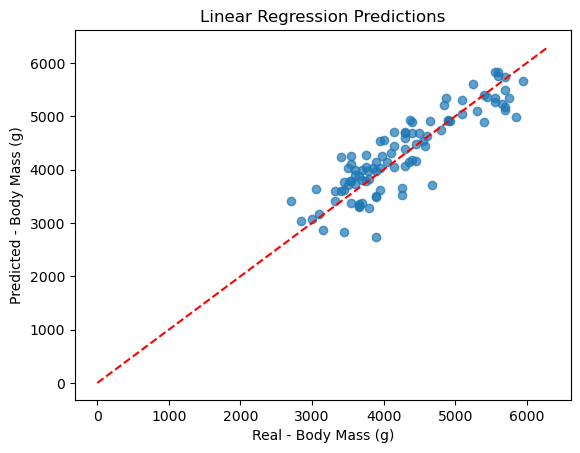

In [134]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Real - Body Mass (g)")
plt.ylabel("Predicted - Body Mass (g)")
plt.title("Linear Regression Predictions")
plt.plot([0, y.max()], [0, y.max()], 'r--')  # perfect fit line
plt.show()

### Regressão Logística

## Conceito  
A **regressão logística** é um modelo estatístico amplamente utilizado em **aprendizado de máquina supervisionado** para tarefas de **classificação binária** (por exemplo, prever se um evento ocorre: "sim" ou "não").  
- Diferente da regressão linear, que estima valores contínuos, a regressão logística modela a **probabilidade** de um resultado pertencer a uma determinada classe.  
- Essa probabilidade é obtida pela **função logística (sigmóide)**:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

onde 
$$  
z = \beta_0 + \beta_1 x_1 + ... + \beta_n x_n 
$$  

O resultado da função varia entre **0 e 1**, interpretado como uma probabilidade.

![Função Sigmóide](https://media.licdn.com/dms/image/v2/D5612AQFs75BpVWjxNg/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1680047110274?e=2147483647&v=beta&t=jD-TOg1ENMbSHjshLCk_o-6Ute1a5DlyKU5thKWFAqQ)

---

## Características principais
- Usada para **classificação binária**, mas pode ser estendida para **multiclasse** (via *one-vs-rest* ou *softmax*).  
- Estima os **coeficientes (\(\beta\))** por métodos como **Máxima Verossimilhança**.  
- Pode incluir tanto variáveis **numéricas** quanto **categóricas** (após codificação adequada, ex. one-hot encoding).  
- A saída é uma **probabilidade**, que pode ser convertida em classes usando um **limiar (threshold)**, normalmente 0.5.  

In [147]:
# Select features (numerical only)
features = [
    'Culmen Length (mm)',
    'Culmen Depth (mm)',
    'Flipper Length (mm)',
    'Body Mass (g)'
]

df_sex = df[features + ['Sex']].dropna()

# Encode target: FEMALE=0, MALE=1
y = df_sex['Sex'].map({'FEMALE': 0, 'MALE': 1})
X = df_sex[features]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9081632653061225
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        44
           1       0.88      0.96      0.92        54

    accuracy                           0.91        98
   macro avg       0.92      0.90      0.91        98
weighted avg       0.91      0.91      0.91        98



In [149]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
cm_df = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)

# Plot interactive heatmap
fig = px.imshow(
    cm_df,
    text_auto=True,  # show values inside cells
    color_continuous_scale="Blues",
    labels=dict(x="Predicted", y="Actual", color="Count"),
    x=cm_df.columns,
    y=cm_df.index,
    title="Confusion Matrix"
)

fig.update_layout(yaxis=dict(scaleanchor="x"))  # square cells
fig.show()